In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import cm
import pandas as pd
from matplotlib import cm
from scipy import constants as const

### Спектры различных типов лазров

Text(0.5, 1.0, 'Диапазоны генерации лазеров различных типов')

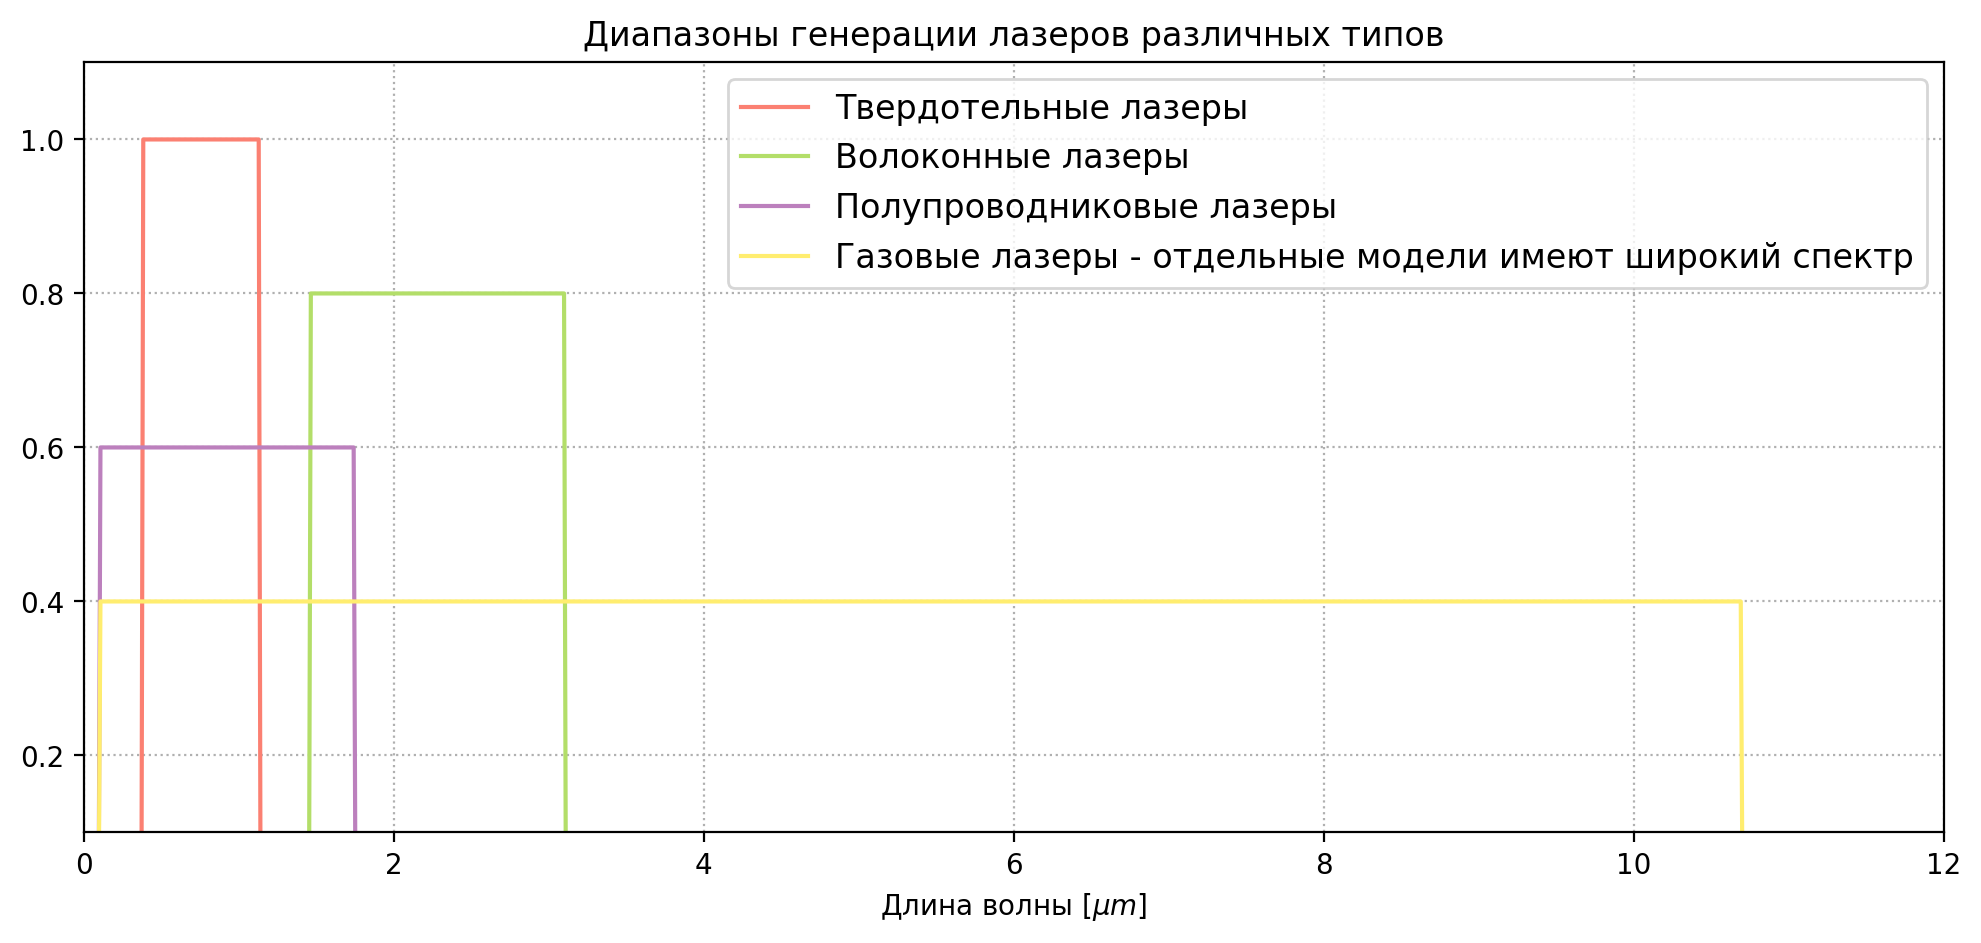

In [9]:
x = np.linspace(0, 12, 1000)

tverd = sts.uniform(380 / 1e3, 750 / 1e3)
volok = sts.uniform(1.46, 1.65)
poluprovod = sts.uniform(100 / 1e3, 1.65)
gas = sts.uniform(0.1, 10.6)

plt.figure(figsize = (12, 5), dpi = 200)
plt.xlabel("Длина волны [$\mu m$]")
plt.plot(x, tverd.pdf(x) / np.max(tverd.pdf(x) + 1e-6), label = 'Твердотельные лазеры', color = cm.Set3(1 / 4))
plt.plot(x, 0.8 * volok.pdf(x) / (np.max(volok.pdf(x)) + 1e-6), label = 'Волоконные лазеры', color = cm.Set3(2 / 4))
plt.plot(x, 0.6 * poluprovod.pdf(x) / (np.max(poluprovod.pdf(x)) + 1e-6), label = 'Полупроводниковые лазеры', color = cm.Set3(3 / 4))
plt.plot(x, 0.4 * gas.pdf(x) / (np.max(gas.pdf(x)) + 1e-6), label = 'Газовые лазеры - отдельные модели имеют широкий спектр', color = cm.Set3(4 / 4))
plt.legend(fontsize = 12)
plt.grid(ls = ':')
plt.ylim(0.1, 1.1)
plt.xlim(0, 12)
plt.title("Диапазоны генерации лазеров различных типов")

In [10]:
char = pd.read_csv('char.csv', dtype = np.float128)
print(np.log(np.abs(1 - char['T'])))
char['t0'] = (- 2 * char['L']) / (const.c * np.log(np.abs(1 - char['T'])))
char['w0'] = np.sqrt((char['x'] - 1) / (char['t0'] * char['tau'] * np.power(0.1, 6)))
char['type'] = ['HeNe', 'полупр', 'YAgNd3+', 'наш']

0   -0.223144
1   -0.430783
2   -0.105361
3   -0.223144
Name: T, dtype: float128


In [11]:
char['w0'] *= 1e-3 / (2 * np.pi) #килогерц
char['t0'] *= 1e6 #мкс
char['NuZhisni'] = 1e-3 / (char['tau'] * np.power(0.1, 6))
char.head()

,type,L,x,T,tau,t0,w0,NuZhisni
0,HeNe,0.20,1.5,0.20,1400.0,0.005979,38.896779,0.714286
1,полупр,0.01,1.5,0.35,7700.0,0.000155,103.058629,0.129870
2,YAgNd3+,1.00,1.5,0.10,230.0,0.063319,29.490050,4.347826
3,наш,1.00,1.5,0.20,1200.0,0.029897,18.788929,0.833333


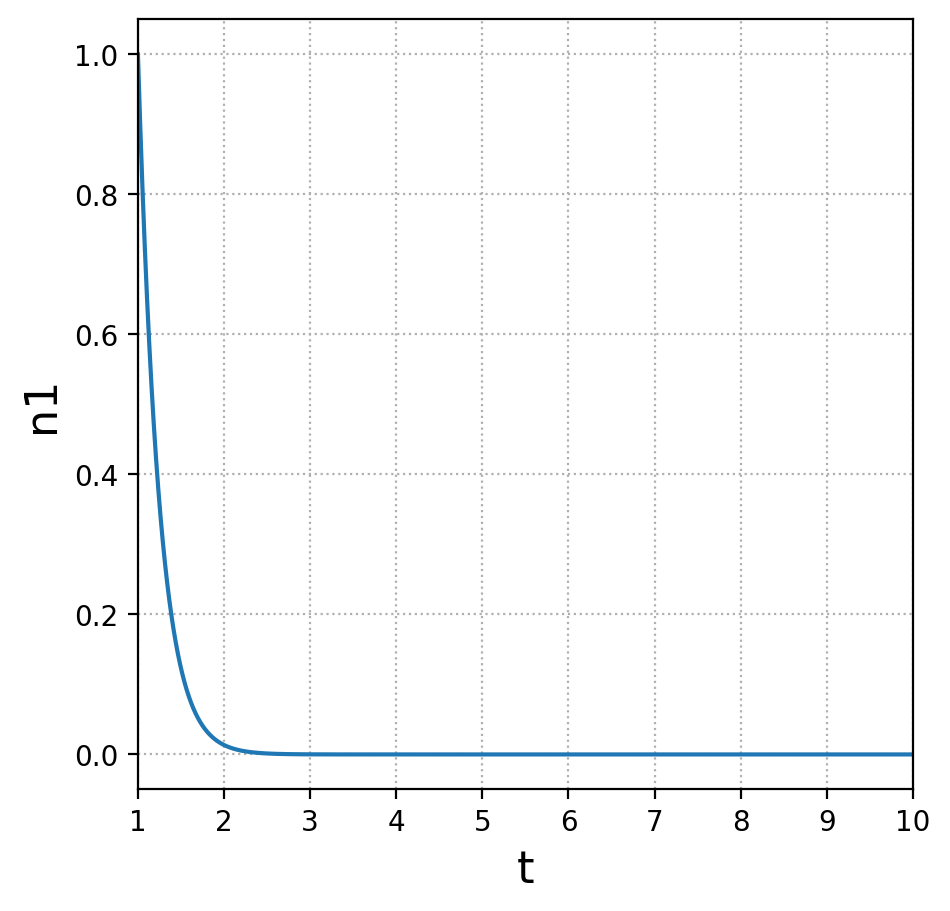

In [12]:
T, B = 300, 0.5
N = 5000
N0 = 200
q = 10
t = np.linspace(1, 10, 10000)

n1 = np.exp(-B * q * t) * t * N0 / (np.exp(55) - 1)

plt.figure(figsize = (5, 5), dpi = 200)
plt.plot(t, n1 / np.max(n1))
plt.xlabel('t', fontsize = 16)
plt.ylabel('n1', fontsize = 16)
plt.xticks(np.arange(10) + 1)
plt.xlim(1, 10)
plt.grid(ls = ':')

In [13]:
np.exp(1.5 / (9 * 300 * 1e-5))

1.3411310481168085e+24

In [14]:
tau = 2 * np.pi / 1e-7
l = 100
nu = 1 / (100 * 1e-9)
print(nu * 1e-6)
nu = 1 / tau
print(f"{nu:.2g}")

10.0
1.6e-08


In [37]:
import numpy as np
veshestvo = np.array([
    "Итербий $Yb^{3+}$",
    "Эрбий $Er^{3+}$",
    r"Неодим $Nd^{3+}$",
    "Диспрозий Dy",
    "Тулий $Tm^{3+}$",
    r"Голмий $Ho^{3+}$",
    "Празеодим Pr",
    "Тербий Tb",
    "Иттебий Tb",
    "Хром Cr",
    "Неодим-иттербий Nd:Yb"
])


wavelength = [
    [[980, 1160]],
    [[1530, 1600]],
    [[920, 940], [1005, 1010], [1340, 1340]],  
    [[1300, 1350]],
    [[1870, 2020]],
    [[2040, 2120]],
    [[1200, 1350]],
    [[1900, 2100]],
    [[480, 550]],
    [[760, 800]],
    [[1064, 1064]]
]

/tmp/ipykernel_81273/3592624344.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, sts.uniform(length[0],
/tmp/ipykernel_81273/3592624344.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(x, sts.uniform(length[0],


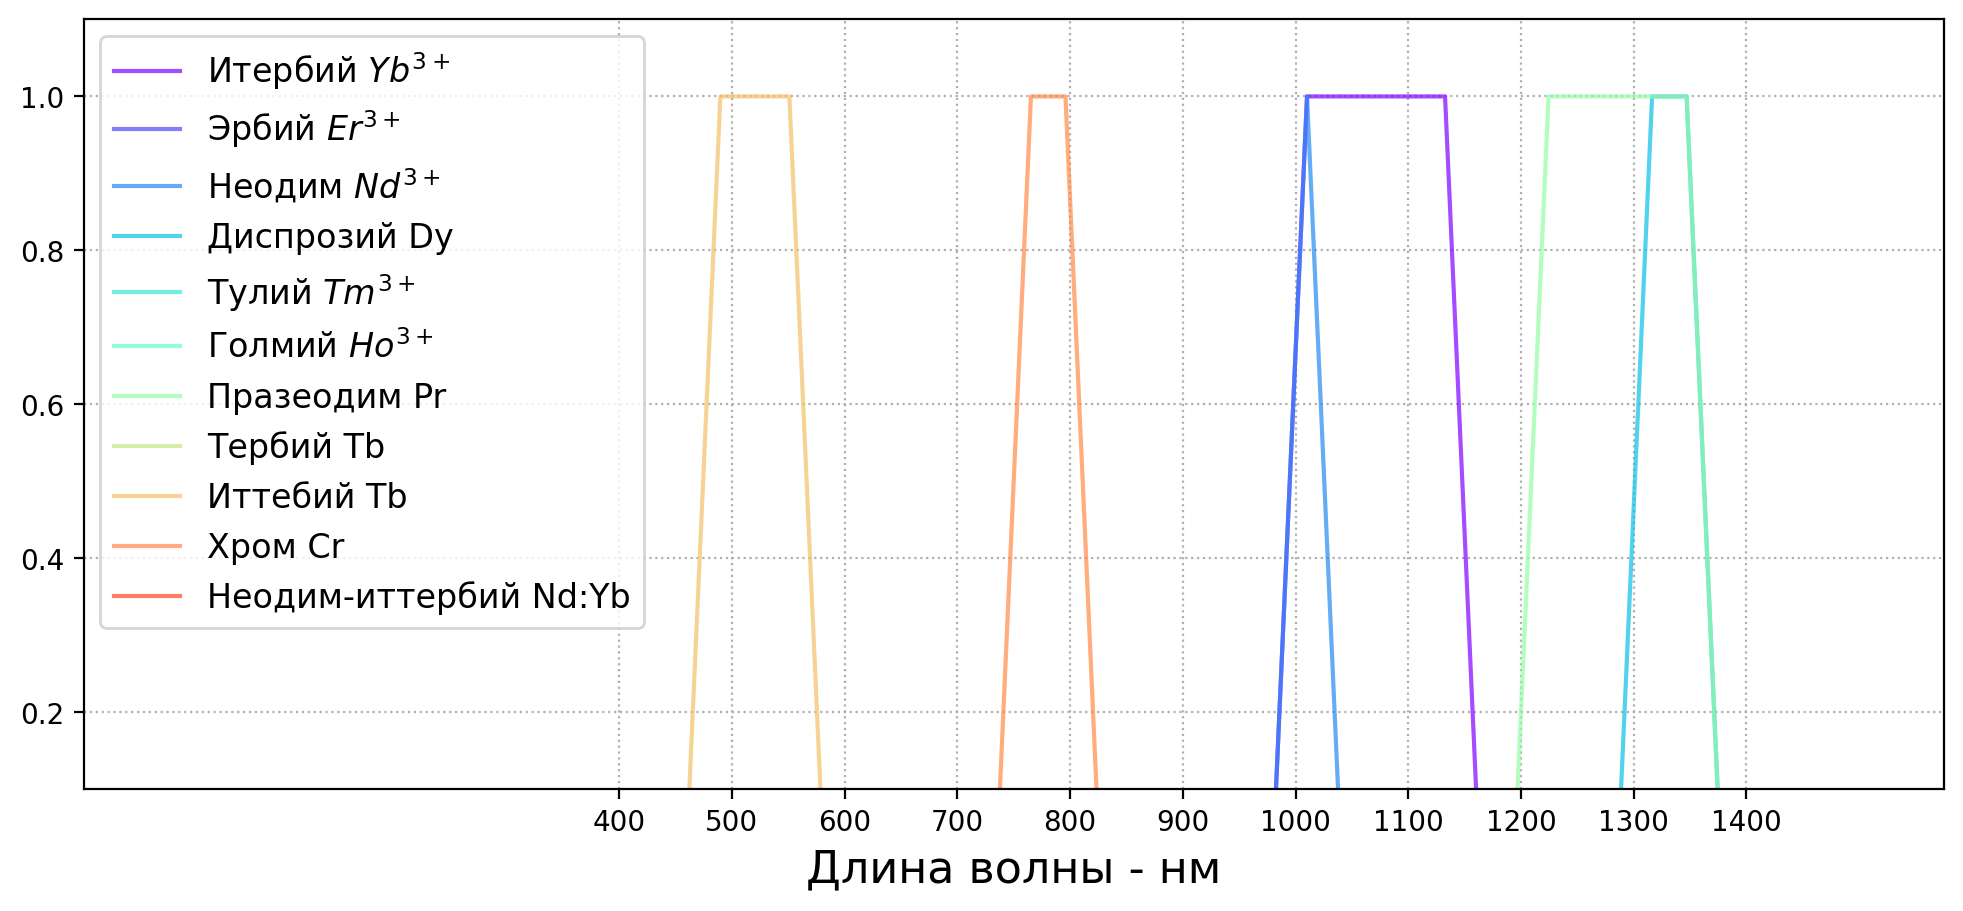

In [38]:
plt.figure(figsize = (12, 5), dpi = 200)
x = np.linspace(0, 1500)
for ind, (name, l) in enumerate(zip(veshestvo, wavelength)):
    for i, length in enumerate(l):
        if not i:
            plt.plot(x, sts.uniform(length[0], 
                                length[1] - length[0] + 2).pdf(x) / np.max(sts.uniform(length[0], length[1] - length[0] + 2).pdf(x)),
                 alpha = 0.7,
                 label = f'{name}', color = cm.rainbow(ind / len(veshestvo)))
        else:
            plt.plot(x, sts.uniform(length[0], 
                                length[1] - length[0] + 2).pdf(x) / np.max(sts.uniform(length[0], length[1] - length[0] + 2).pdf(x)),
                 alpha = 0.7, color = cm.rainbow(ind / len(veshestvo)))
    
plt.legend(fontsize = 12)
plt.ylim(0.1, 1.1)
plt.xlabel("Длина волны - нм", fontsize = 16)
plt.grid(ls = ':')
plt.xticks(np.arange(400, 1500, 100));